In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../figures")

from what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

In [4]:
from main import init
args = init(filename='../data/2019-06-12') # pas de drop out!
args.what_offset_std = 0
args.what_offset_max = 25
args.contrast = None
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 1.0,
 'contrast': None,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-05',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'what_offset_std': 0,
 'what_offset_max': 25}

## Unit tests

In [5]:
i_offset = None
j_offset = None

In [6]:
transform=transforms.Compose([
                               WhatShift(args,i_offset=i_offset, j_offset=j_offset),
                               WhatBackground(contrast = args.contrast,
                                              noise=args.noise, 
                                              sf_0=args.sf_0, 
                                              B_sf=args.B_sf),
                               transforms.ToTensor(),
                               #transforms.Normalize((args.mean,), (args.std,))
                           ])

In [7]:
dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

In [8]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [9]:
dataset_test = MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        )

In [10]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [11]:
data, label = next(iter(train_loader))

In [12]:
label.shape

torch.Size([100])

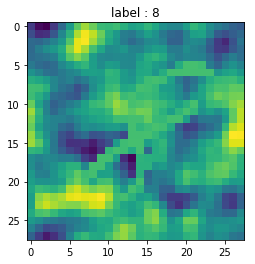

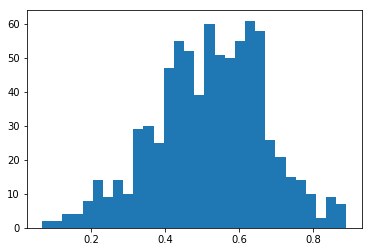

In [13]:
i = 3
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))
plt.show()
h = plt.hist(data[i,:,:].detach().numpy().flatten(), 30)

In [14]:
device = 'cpu'
model = WhatNet().to(device)
loss_func = F.nll_loss
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

In [15]:
if False:
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, loss_func, optimizer, epoch)
        test(args, model, device, test_loader)

## WhatTrainer Class test

In [16]:
whatTrainer = WhatTrainer(args=args)

In [17]:
if False:
    for epoch in range(2, args.epochs + 1):
        whatTrainer.train(epoch)
        whatTrainer.test()

## What class test

In [18]:
if False:
    args.epochs = 1
    args.save_model = True
    what = What(args=args, force= True)
    acc = what.trainer.test()

### Script d'entraînement de /MNIST_cnn_0.1_0.1_1.0_0.7.pt

In [19]:
if True :
    import sys
    import datetime

    #sys.path.append("../figures")
    #from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST
    #from main import init

    #args = init(filename='../data/2019-06-12')

    args.epochs = 5  # 10 plus tard
    args.save_model = True

    debut = datetime.datetime.now()
    date = str(debut)

    liste_std = [i for i in range(0, 16)]  # pas de 1 de std

    args.what_offset_max = 25
    args.do_adam = True #'adam'
    args.what_offset_std = liste_std[0]
    print("En cours : std = 0\n")
    what = What(args, force=True, seed=0, robust=True)

    seed = 1
    for std in liste_std[1:]:
        print("En cours : std = " + str(std) + "\n")

        args.what_offset_std = std
        what_model = what.model
        what = What(args, model=what_model, force=True, seed=seed, robust=True)
        seed += 1
        print("\n")
        if args.contrast is not None:
            suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std)
        else:
            suffix = "robust_{}_{}_{}_all_{}".format(args.sf_0, args.B_sf, args.noise, std)
        what_model_path = "../data/MNIST_cnn_{}.pt".format(suffix)
        torch.save(what_model, what_model_path)

    fin = datetime.datetime.now()
    print("\n\nDuree d'execution : " + str(fin - debut))



En cours : std = 0

Training the What model
Train Epoch: 1/5 [0/60000 (0%)]	Loss: 2.303123
Train Epoch: 1/5 [10000/60000 (17%)]	Loss: 1.381616
Train Epoch: 1/5 [20000/60000 (33%)]	Loss: 0.734503
Train Epoch: 1/5 [30000/60000 (50%)]	Loss: 0.624045
Train Epoch: 1/5 [40000/60000 (67%)]	Loss: 0.463076
Train Epoch: 1/5 [50000/60000 (83%)]	Loss: 0.656665

Test set: Average loss: 0.0047, Accuracy: 8504/10000 (85%)

Train Epoch: 2/5 [0/60000 (0%)]	Loss: 0.469808
Train Epoch: 2/5 [10000/60000 (17%)]	Loss: 0.436127
Train Epoch: 2/5 [20000/60000 (33%)]	Loss: 0.466370
Train Epoch: 2/5 [30000/60000 (50%)]	Loss: 0.377823
Train Epoch: 2/5 [40000/60000 (67%)]	Loss: 0.390392
Train Epoch: 2/5 [50000/60000 (83%)]	Loss: 0.471371

Test set: Average loss: 0.0039, Accuracy: 8691/10000 (87%)

Train Epoch: 3/5 [0/60000 (0%)]	Loss: 0.461572
Train Epoch: 3/5 [10000/60000 (17%)]	Loss: 0.292807
Train Epoch: 3/5 [20000/60000 (33%)]	Loss: 0.234437
Train Epoch: 3/5 [30000/60000 (50%)]	Loss: 0.603370
Train Epoch: 3/5 

Train Epoch: 2/5 [20000/60000 (33%)]	Loss: 0.698627
Train Epoch: 2/5 [30000/60000 (50%)]	Loss: 0.649966
Train Epoch: 2/5 [40000/60000 (67%)]	Loss: 0.786301
Train Epoch: 2/5 [50000/60000 (83%)]	Loss: 0.698346

Test set: Average loss: 0.0067, Accuracy: 7811/10000 (78%)

Train Epoch: 3/5 [0/60000 (0%)]	Loss: 0.681561
Train Epoch: 3/5 [10000/60000 (17%)]	Loss: 0.581826
Train Epoch: 3/5 [20000/60000 (33%)]	Loss: 0.762066
Train Epoch: 3/5 [30000/60000 (50%)]	Loss: 0.710412
Train Epoch: 3/5 [40000/60000 (67%)]	Loss: 0.592958
Train Epoch: 3/5 [50000/60000 (83%)]	Loss: 0.598626

Test set: Average loss: 0.0065, Accuracy: 7864/10000 (79%)

Train Epoch: 4/5 [0/60000 (0%)]	Loss: 0.671918
Train Epoch: 4/5 [10000/60000 (17%)]	Loss: 0.527576
Train Epoch: 4/5 [20000/60000 (33%)]	Loss: 0.579742
Train Epoch: 4/5 [30000/60000 (50%)]	Loss: 0.619586
Train Epoch: 4/5 [40000/60000 (67%)]	Loss: 0.717843
Train Epoch: 4/5 [50000/60000 (83%)]	Loss: 0.546705

Test set: Average loss: 0.0068, Accuracy: 7833/10000 (7

Train Epoch: 3/5 [40000/60000 (67%)]	Loss: 1.345635
Train Epoch: 3/5 [50000/60000 (83%)]	Loss: 0.989938

Test set: Average loss: 0.0120, Accuracy: 5834/10000 (58%)

Train Epoch: 4/5 [0/60000 (0%)]	Loss: 1.217290
Train Epoch: 4/5 [10000/60000 (17%)]	Loss: 1.093817
Train Epoch: 4/5 [20000/60000 (33%)]	Loss: 1.182748
Train Epoch: 4/5 [30000/60000 (50%)]	Loss: 1.200386
Train Epoch: 4/5 [40000/60000 (67%)]	Loss: 1.083603
Train Epoch: 4/5 [50000/60000 (83%)]	Loss: 1.081542

Test set: Average loss: 0.0121, Accuracy: 5837/10000 (58%)

Train Epoch: 5/5 [0/60000 (0%)]	Loss: 1.098238
Train Epoch: 5/5 [10000/60000 (17%)]	Loss: 1.124308
Train Epoch: 5/5 [20000/60000 (33%)]	Loss: 1.005592
Train Epoch: 5/5 [30000/60000 (50%)]	Loss: 1.161074
Train Epoch: 5/5 [40000/60000 (67%)]	Loss: 1.177522
Train Epoch: 5/5 [50000/60000 (83%)]	Loss: 1.165342

Test set: Average loss: 0.0122, Accuracy: 5790/10000 (58%)

../data/MNIST_cnn_robust_0.1_0.1_1.0_None_8.pt


En cours : std = 9

Training the What model
Train 


Test set: Average loss: 0.0163, Accuracy: 4116/10000 (41%)

Train Epoch: 5/5 [0/60000 (0%)]	Loss: 1.555918
Train Epoch: 5/5 [10000/60000 (17%)]	Loss: 1.386639
Train Epoch: 5/5 [20000/60000 (33%)]	Loss: 1.530812
Train Epoch: 5/5 [30000/60000 (50%)]	Loss: 1.444633
Train Epoch: 5/5 [40000/60000 (67%)]	Loss: 1.623733
Train Epoch: 5/5 [50000/60000 (83%)]	Loss: 1.570059

Test set: Average loss: 0.0164, Accuracy: 4141/10000 (41%)

../data/MNIST_cnn_robust_0.1_0.1_1.0_None_12.pt


En cours : std = 13

Training the What model
Train Epoch: 1/5 [0/60000 (0%)]	Loss: 1.512070
Train Epoch: 1/5 [10000/60000 (17%)]	Loss: 1.529256
Train Epoch: 1/5 [20000/60000 (33%)]	Loss: 1.650845
Train Epoch: 1/5 [30000/60000 (50%)]	Loss: 1.854129
Train Epoch: 1/5 [40000/60000 (67%)]	Loss: 1.667249
Train Epoch: 1/5 [50000/60000 (83%)]	Loss: 1.822106

Test set: Average loss: 0.0168, Accuracy: 3910/10000 (39%)

Train Epoch: 2/5 [0/60000 (0%)]	Loss: 1.699424
Train Epoch: 2/5 [10000/60000 (17%)]	Loss: 1.493055
Train Epo

In [22]:
print(args.contrast)

None


In [16]:
if False:
    what_model = what.model
    if args.contrast is not None:
        suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std)
    else:
        suffix = "robust_{}_{}_{}_all_{}".format(args.sf_0, args.B_sf, args.noise, std)
    what_model_path = "../data/MNIST_cnn_{}.pt".format(suffix)
    torch.save(what_model, what_model_path)

In [23]:
acc = what.trainer.test()


Test set: Average loss: 0.0183, Accuracy: 3367/10000 (34%)



In [25]:
suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std)
model_path = "../data/MNIST_cnn_{}.pt".format(suffix)
what_model = torch.load(model_path)
if True:
    args.what_offset_std = 0
    seed = 1
    what = What(args, model=what_model, seed=seed)
    acc = what.trainer.test()


Test set: Average loss: 0.0072, Accuracy: 8036/10000 (80%)



In [27]:
if True:
    suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std)
    model_path = "../data/MNIST_cnn_{}.pt".format(suffix)
    model = torch.load(model_path)
    print(args.do_adam)
    acc_map = np.zeros((55, 55))
    seed = 0
    for i_offset in range(-27,28):
        for j_offset in range(-27,28):
            transform=transforms.Compose([
                                   WhatShift(args, i_offset=i_offset, j_offset=j_offset),
                                   WhatBackground(contrast = args.contrast,
                                                  noise=args.noise, 
                                                  sf_0=args.sf_0, 
                                                  B_sf=args.B_sf,
                                                  seed = seed),
                                   transforms.ToTensor(),
                                   #transforms.Normalize((args.mean,), (args.std,))
                               ])
            dataset_test = MNIST('../data',
                            train=False,
                            download=True,
                            transform=transform,
                            )
            test_loader = torch.utils.data.DataLoader(dataset_test,
                                             batch_size=args.minibatch_size,
                                             shuffle=True)
            whatTrainer = WhatTrainer(args, model = model, test_loader = test_loader, seed = seed)
            acc = whatTrainer.test()
            print(i_offset, j_offset, acc)
            acc_map[i_offset + 27, j_offset + 27] = acc
            seed += 1

    map_path = "../data/MNIST_accuracy_{}.npy".format(suffix)
    np.save(map_path, acc_map)        

True

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-27 -27 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-27 -26 0.1135

Test set: Average loss: 0.0230, Accuracy: 1010/10000 (10%)

-27 -25 0.101

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-27 -24 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-27 -23 0.1135

Test set: Average loss: 0.0233, Accuracy: 1135/10000 (11%)

-27 -22 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-27 -21 0.1135

Test set: Average loss: 0.0232, Accuracy: 1007/10000 (10%)

-27 -20 0.1007

Test set: Average loss: 0.0236, Accuracy: 1135/10000 (11%)

-27 -19 0.1135

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-27 -18 0.1136

Test set: Average loss: 0.0231, Accuracy: 1137/10000 (11%)

-27 -17 0.1137

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-27 -16 0.1136

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

-27 -15 0.1138

Test se


Test set: Average loss: 0.0238, Accuracy: 958/10000 (10%)

-25 -27 0.0958

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-25 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-25 -25 0.1135

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-25 -24 0.1136

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-25 -23 0.1136

Test set: Average loss: 0.0231, Accuracy: 1137/10000 (11%)

-25 -22 0.1137

Test set: Average loss: 0.0234, Accuracy: 1141/10000 (11%)

-25 -21 0.1141

Test set: Average loss: 0.0233, Accuracy: 1141/10000 (11%)

-25 -20 0.1141

Test set: Average loss: 0.0232, Accuracy: 1150/10000 (12%)

-25 -19 0.115

Test set: Average loss: 0.0231, Accuracy: 1160/10000 (12%)

-25 -18 0.116

Test set: Average loss: 0.0231, Accuracy: 1184/10000 (12%)

-25 -17 0.1184

Test set: Average loss: 0.0231, Accuracy: 1193/10000 (12%)

-25 -16 0.1193

Test set: Average loss: 0.0231, Accuracy: 1223/10000 (12%)

-25 -15 0.1223

Test set: Aver


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-23 -27 0.1135

Test set: Average loss: 0.0269, Accuracy: 1135/10000 (11%)

-23 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-23 -25 0.1136

Test set: Average loss: 0.0230, Accuracy: 1138/10000 (11%)

-23 -24 0.1138

Test set: Average loss: 0.0232, Accuracy: 1137/10000 (11%)

-23 -23 0.1137

Test set: Average loss: 0.0234, Accuracy: 1141/10000 (11%)

-23 -22 0.1141

Test set: Average loss: 0.0232, Accuracy: 956/10000 (10%)

-23 -21 0.0956

Test set: Average loss: 0.0231, Accuracy: 1155/10000 (12%)

-23 -20 0.1155

Test set: Average loss: 0.0231, Accuracy: 869/10000 (9%)

-23 -19 0.0869

Test set: Average loss: 0.0231, Accuracy: 1186/10000 (12%)

-23 -18 0.1186

Test set: Average loss: 0.0232, Accuracy: 1193/10000 (12%)

-23 -17 0.1193

Test set: Average loss: 0.0232, Accuracy: 1159/10000 (12%)

-23 -16 0.1159

Test set: Average loss: 0.0231, Accuracy: 1176/10000 (12%)

-23 -15 0.1176

Test set: Aver


Test set: Average loss: 0.0231, Accuracy: 1009/10000 (10%)

-21 -27 0.1009

Test set: Average loss: 0.0232, Accuracy: 1135/10000 (11%)

-21 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-21 -25 0.1135

Test set: Average loss: 0.0233, Accuracy: 981/10000 (10%)

-21 -24 0.0981

Test set: Average loss: 0.0233, Accuracy: 968/10000 (10%)

-21 -23 0.0968

Test set: Average loss: 0.0232, Accuracy: 987/10000 (10%)

-21 -22 0.0987

Test set: Average loss: 0.0232, Accuracy: 878/10000 (9%)

-21 -21 0.0878

Test set: Average loss: 0.0231, Accuracy: 1170/10000 (12%)

-21 -20 0.117

Test set: Average loss: 0.0230, Accuracy: 1188/10000 (12%)

-21 -19 0.1188

Test set: Average loss: 0.0231, Accuracy: 1198/10000 (12%)

-21 -18 0.1198

Test set: Average loss: 0.0231, Accuracy: 1234/10000 (12%)

-21 -17 0.1234

Test set: Average loss: 0.0233, Accuracy: 1251/10000 (13%)

-21 -16 0.1251

Test set: Average loss: 0.0230, Accuracy: 1202/10000 (12%)

-21 -15 0.1202

Test set: Average


Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-19 -27 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-19 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-19 -25 0.1135

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

-19 -24 0.1138

Test set: Average loss: 0.0230, Accuracy: 1142/10000 (11%)

-19 -23 0.1142

Test set: Average loss: 0.0231, Accuracy: 1000/10000 (10%)

-19 -22 0.1

Test set: Average loss: 0.0231, Accuracy: 1174/10000 (12%)

-19 -21 0.1174

Test set: Average loss: 0.0231, Accuracy: 951/10000 (10%)

-19 -20 0.0951

Test set: Average loss: 0.0231, Accuracy: 1246/10000 (12%)

-19 -19 0.1246

Test set: Average loss: 0.0236, Accuracy: 1283/10000 (13%)

-19 -18 0.1283

Test set: Average loss: 0.0231, Accuracy: 1320/10000 (13%)

-19 -17 0.132

Test set: Average loss: 0.0226, Accuracy: 1364/10000 (14%)

-19 -16 0.1364

Test set: Average loss: 0.0228, Accuracy: 1441/10000 (14%)

-19 -15 0.1441

Test set: Averag


Test set: Average loss: 0.0232, Accuracy: 892/10000 (9%)

-17 -27 0.0892

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-17 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-17 -25 0.1136

Test set: Average loss: 0.0231, Accuracy: 1141/10000 (11%)

-17 -24 0.1141

Test set: Average loss: 0.0231, Accuracy: 1147/10000 (11%)

-17 -23 0.1147

Test set: Average loss: 0.0230, Accuracy: 1173/10000 (12%)

-17 -22 0.1173

Test set: Average loss: 0.0232, Accuracy: 1169/10000 (12%)

-17 -21 0.1169

Test set: Average loss: 0.0229, Accuracy: 1202/10000 (12%)

-17 -20 0.1202

Test set: Average loss: 0.0231, Accuracy: 1277/10000 (13%)

-17 -19 0.1277

Test set: Average loss: 0.0228, Accuracy: 1321/10000 (13%)

-17 -18 0.1321

Test set: Average loss: 0.0230, Accuracy: 1366/10000 (14%)

-17 -17 0.1366

Test set: Average loss: 0.0229, Accuracy: 1418/10000 (14%)

-17 -16 0.1418

Test set: Average loss: 0.0228, Accuracy: 1190/10000 (12%)

-17 -15 0.119

Test set: Aver


Test set: Average loss: 0.0230, Accuracy: 1136/10000 (11%)

-15 -27 0.1136

Test set: Average loss: 0.0234, Accuracy: 1135/10000 (11%)

-15 -26 0.1135

Test set: Average loss: 0.0233, Accuracy: 976/10000 (10%)

-15 -25 0.0976

Test set: Average loss: 0.0238, Accuracy: 1028/10000 (10%)

-15 -24 0.1028

Test set: Average loss: 0.0231, Accuracy: 1153/10000 (12%)

-15 -23 0.1153

Test set: Average loss: 0.0230, Accuracy: 1172/10000 (12%)

-15 -22 0.1172

Test set: Average loss: 0.0230, Accuracy: 1202/10000 (12%)

-15 -21 0.1202

Test set: Average loss: 0.0231, Accuracy: 1246/10000 (12%)

-15 -20 0.1246

Test set: Average loss: 0.0231, Accuracy: 1294/10000 (13%)

-15 -19 0.1294

Test set: Average loss: 0.0232, Accuracy: 1365/10000 (14%)

-15 -18 0.1365

Test set: Average loss: 0.0233, Accuracy: 1398/10000 (14%)

-15 -17 0.1398

Test set: Average loss: 0.0231, Accuracy: 974/10000 (10%)

-15 -16 0.0974

Test set: Average loss: 0.0227, Accuracy: 1445/10000 (14%)

-15 -15 0.1445

Test set: Ave


Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-13 -27 0.1135

Test set: Average loss: 0.0230, Accuracy: 1134/10000 (11%)

-13 -26 0.1134

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-13 -25 0.1136

Test set: Average loss: 0.0231, Accuracy: 1149/10000 (11%)

-13 -24 0.1149

Test set: Average loss: 0.0233, Accuracy: 951/10000 (10%)

-13 -23 0.0951

Test set: Average loss: 0.0231, Accuracy: 869/10000 (9%)

-13 -22 0.0869

Test set: Average loss: 0.0231, Accuracy: 1217/10000 (12%)

-13 -21 0.1217

Test set: Average loss: 0.0231, Accuracy: 1284/10000 (13%)

-13 -20 0.1284

Test set: Average loss: 0.0234, Accuracy: 1357/10000 (14%)

-13 -19 0.1357

Test set: Average loss: 0.0233, Accuracy: 1439/10000 (14%)

-13 -18 0.1439

Test set: Average loss: 0.0235, Accuracy: 774/10000 (8%)

-13 -17 0.0774

Test set: Average loss: 0.0231, Accuracy: 1496/10000 (15%)

-13 -16 0.1496

Test set: Average loss: 0.0225, Accuracy: 1585/10000 (16%)

-13 -15 0.1585

Test set: Averag


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-11 -27 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-11 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1139/10000 (11%)

-11 -25 0.1139

Test set: Average loss: 0.0231, Accuracy: 1149/10000 (11%)

-11 -24 0.1149

Test set: Average loss: 0.0231, Accuracy: 1158/10000 (12%)

-11 -23 0.1158

Test set: Average loss: 0.0232, Accuracy: 757/10000 (8%)

-11 -22 0.0757

Test set: Average loss: 0.0236, Accuracy: 274/10000 (3%)

-11 -21 0.0274

Test set: Average loss: 0.0233, Accuracy: 1324/10000 (13%)

-11 -20 0.1324

Test set: Average loss: 0.0232, Accuracy: 1400/10000 (14%)

-11 -19 0.14

Test set: Average loss: 0.0232, Accuracy: 1481/10000 (15%)

-11 -18 0.1481

Test set: Average loss: 0.0229, Accuracy: 1573/10000 (16%)

-11 -17 0.1573

Test set: Average loss: 0.0226, Accuracy: 1634/10000 (16%)

-11 -16 0.1634

Test set: Average loss: 0.0217, Accuracy: 2005/10000 (20%)

-11 -15 0.2005

Test set: Average


Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-9 -27 0.1135

Test set: Average loss: 0.0231, Accuracy: 1011/10000 (10%)

-9 -26 0.1011

Test set: Average loss: 0.0232, Accuracy: 919/10000 (9%)

-9 -25 0.0919

Test set: Average loss: 0.0231, Accuracy: 1161/10000 (12%)

-9 -24 0.1161

Test set: Average loss: 0.0230, Accuracy: 1175/10000 (12%)

-9 -23 0.1175

Test set: Average loss: 0.0231, Accuracy: 1222/10000 (12%)

-9 -22 0.1222

Test set: Average loss: 0.0233, Accuracy: 1258/10000 (13%)

-9 -21 0.1258

Test set: Average loss: 0.0232, Accuracy: 1321/10000 (13%)

-9 -20 0.1321

Test set: Average loss: 0.0231, Accuracy: 1425/10000 (14%)

-9 -19 0.1425

Test set: Average loss: 0.0232, Accuracy: 859/10000 (9%)

-9 -18 0.0859

Test set: Average loss: 0.0224, Accuracy: 1687/10000 (17%)

-9 -17 0.1687

Test set: Average loss: 0.0221, Accuracy: 1907/10000 (19%)

-9 -16 0.1907

Test set: Average loss: 0.0211, Accuracy: 2292/10000 (23%)

-9 -15 0.2292

Test set: Average loss: 0.02


Test set: Average loss: 0.0232, Accuracy: 1032/10000 (10%)

-7 -26 0.1032

Test set: Average loss: 0.0231, Accuracy: 1013/10000 (10%)

-7 -25 0.1013

Test set: Average loss: 0.0231, Accuracy: 1158/10000 (12%)

-7 -24 0.1158

Test set: Average loss: 0.0231, Accuracy: 1178/10000 (12%)

-7 -23 0.1178

Test set: Average loss: 0.0230, Accuracy: 1214/10000 (12%)

-7 -22 0.1214

Test set: Average loss: 0.0234, Accuracy: 472/10000 (5%)

-7 -21 0.0472

Test set: Average loss: 0.0233, Accuracy: 598/10000 (6%)

-7 -20 0.0598

Test set: Average loss: 0.0231, Accuracy: 1408/10000 (14%)

-7 -19 0.1408

Test set: Average loss: 0.0229, Accuracy: 1545/10000 (15%)

-7 -18 0.1545

Test set: Average loss: 0.0225, Accuracy: 1430/10000 (14%)

-7 -17 0.143

Test set: Average loss: 0.0219, Accuracy: 1957/10000 (20%)

-7 -16 0.1957

Test set: Average loss: 0.0208, Accuracy: 2484/10000 (25%)

-7 -15 0.2484

Test set: Average loss: 0.0195, Accuracy: 2978/10000 (30%)

-7 -14 0.2978

Test set: Average loss: 0.018


Test set: Average loss: 0.0231, Accuracy: 1144/10000 (11%)

-5 -25 0.1144

Test set: Average loss: 0.0231, Accuracy: 1164/10000 (12%)

-5 -24 0.1164

Test set: Average loss: 0.0230, Accuracy: 1180/10000 (12%)

-5 -23 0.118

Test set: Average loss: 0.0232, Accuracy: 1212/10000 (12%)

-5 -22 0.1212

Test set: Average loss: 0.0230, Accuracy: 1265/10000 (13%)

-5 -21 0.1265

Test set: Average loss: 0.0233, Accuracy: 1315/10000 (13%)

-5 -20 0.1315

Test set: Average loss: 0.0228, Accuracy: 1440/10000 (14%)

-5 -19 0.144

Test set: Average loss: 0.0227, Accuracy: 1696/10000 (17%)

-5 -18 0.1696

Test set: Average loss: 0.0221, Accuracy: 1718/10000 (17%)

-5 -17 0.1718

Test set: Average loss: 0.0212, Accuracy: 2474/10000 (25%)

-5 -16 0.2474

Test set: Average loss: 0.0201, Accuracy: 2943/10000 (29%)

-5 -15 0.2943

Test set: Average loss: 0.0187, Accuracy: 3589/10000 (36%)

-5 -14 0.3589

Test set: Average loss: 0.0172, Accuracy: 4140/10000 (41%)

-5 -13 0.414

Test set: Average loss: 0.0


Test set: Average loss: 0.0230, Accuracy: 1154/10000 (12%)

-3 -24 0.1154

Test set: Average loss: 0.0233, Accuracy: 747/10000 (7%)

-3 -23 0.0747

Test set: Average loss: 0.0230, Accuracy: 1250/10000 (12%)

-3 -22 0.125

Test set: Average loss: 0.0232, Accuracy: 1315/10000 (13%)

-3 -21 0.1315

Test set: Average loss: 0.0230, Accuracy: 1422/10000 (14%)

-3 -20 0.1422

Test set: Average loss: 0.0226, Accuracy: 1657/10000 (17%)

-3 -19 0.1657

Test set: Average loss: 0.0224, Accuracy: 1943/10000 (19%)

-3 -18 0.1943

Test set: Average loss: 0.0216, Accuracy: 2141/10000 (21%)

-3 -17 0.2141

Test set: Average loss: 0.0207, Accuracy: 2865/10000 (29%)

-3 -16 0.2865

Test set: Average loss: 0.0191, Accuracy: 3545/10000 (35%)

-3 -15 0.3545

Test set: Average loss: 0.0177, Accuracy: 4126/10000 (41%)

-3 -14 0.4126

Test set: Average loss: 0.0164, Accuracy: 4480/10000 (45%)

-3 -13 0.448

Test set: Average loss: 0.0156, Accuracy: 4798/10000 (48%)

-3 -12 0.4798

Test set: Average loss: 0.01


Test set: Average loss: 0.0232, Accuracy: 1015/10000 (10%)

-1 -23 0.1015

Test set: Average loss: 0.0228, Accuracy: 1288/10000 (13%)

-1 -22 0.1288

Test set: Average loss: 0.0229, Accuracy: 1407/10000 (14%)

-1 -21 0.1407

Test set: Average loss: 0.0229, Accuracy: 1579/10000 (16%)

-1 -20 0.1579

Test set: Average loss: 0.0223, Accuracy: 1879/10000 (19%)

-1 -19 0.1879

Test set: Average loss: 0.0218, Accuracy: 2283/10000 (23%)

-1 -18 0.2283

Test set: Average loss: 0.0209, Accuracy: 2869/10000 (29%)

-1 -17 0.2869

Test set: Average loss: 0.0198, Accuracy: 3369/10000 (34%)

-1 -16 0.3369

Test set: Average loss: 0.0184, Accuracy: 3967/10000 (40%)

-1 -15 0.3967

Test set: Average loss: 0.0171, Accuracy: 4401/10000 (44%)

-1 -14 0.4401

Test set: Average loss: 0.0161, Accuracy: 4688/10000 (47%)

-1 -13 0.4688

Test set: Average loss: 0.0154, Accuracy: 4894/10000 (49%)

-1 -12 0.4894

Test set: Average loss: 0.0147, Accuracy: 5216/10000 (52%)

-1 -11 0.5216

Test set: Average loss: 


Test set: Average loss: 0.0225, Accuracy: 1497/10000 (15%)

1 -21 0.1497

Test set: Average loss: 0.0225, Accuracy: 1748/10000 (17%)

1 -20 0.1748

Test set: Average loss: 0.0222, Accuracy: 2051/10000 (21%)

1 -19 0.2051

Test set: Average loss: 0.0216, Accuracy: 2492/10000 (25%)

1 -18 0.2492

Test set: Average loss: 0.0208, Accuracy: 2893/10000 (29%)

1 -17 0.2893

Test set: Average loss: 0.0199, Accuracy: 3360/10000 (34%)

1 -16 0.336

Test set: Average loss: 0.0186, Accuracy: 3803/10000 (38%)

1 -15 0.3803

Test set: Average loss: 0.0177, Accuracy: 4107/10000 (41%)

1 -14 0.4107

Test set: Average loss: 0.0167, Accuracy: 4386/10000 (44%)

1 -13 0.4386

Test set: Average loss: 0.0157, Accuracy: 4752/10000 (48%)

1 -12 0.4752

Test set: Average loss: 0.0153, Accuracy: 4996/10000 (50%)

1 -11 0.4996

Test set: Average loss: 0.0145, Accuracy: 5389/10000 (54%)

1 -10 0.5389

Test set: Average loss: 0.0128, Accuracy: 6000/10000 (60%)

1 -9 0.6

Test set: Average loss: 0.0116, Accuracy: 


Test set: Average loss: 0.0218, Accuracy: 2417/10000 (24%)

3 -18 0.2417

Test set: Average loss: 0.0212, Accuracy: 2736/10000 (27%)

3 -17 0.2736

Test set: Average loss: 0.0204, Accuracy: 2985/10000 (30%)

3 -16 0.2985

Test set: Average loss: 0.0198, Accuracy: 3250/10000 (32%)

3 -15 0.325

Test set: Average loss: 0.0188, Accuracy: 3544/10000 (35%)

3 -14 0.3544

Test set: Average loss: 0.0180, Accuracy: 3862/10000 (39%)

3 -13 0.3862

Test set: Average loss: 0.0174, Accuracy: 4119/10000 (41%)

3 -12 0.4119

Test set: Average loss: 0.0166, Accuracy: 4516/10000 (45%)

3 -11 0.4516

Test set: Average loss: 0.0155, Accuracy: 4951/10000 (50%)

3 -10 0.4951

Test set: Average loss: 0.0141, Accuracy: 5605/10000 (56%)

3 -9 0.5605

Test set: Average loss: 0.0126, Accuracy: 6169/10000 (62%)

3 -8 0.6169

Test set: Average loss: 0.0117, Accuracy: 6504/10000 (65%)

3 -7 0.6504

Test set: Average loss: 0.0104, Accuracy: 6893/10000 (69%)

3 -6 0.6893

Test set: Average loss: 0.0099, Accuracy: 


Test set: Average loss: 0.0210, Accuracy: 2760/10000 (28%)

5 -15 0.276

Test set: Average loss: 0.0204, Accuracy: 2950/10000 (30%)

5 -14 0.295

Test set: Average loss: 0.0197, Accuracy: 3312/10000 (33%)

5 -13 0.3312

Test set: Average loss: 0.0186, Accuracy: 3629/10000 (36%)

5 -12 0.3629

Test set: Average loss: 0.0174, Accuracy: 4084/10000 (41%)

5 -11 0.4084

Test set: Average loss: 0.0161, Accuracy: 4685/10000 (47%)

5 -10 0.4685

Test set: Average loss: 0.0148, Accuracy: 5259/10000 (53%)

5 -9 0.5259

Test set: Average loss: 0.0134, Accuracy: 5872/10000 (59%)

5 -8 0.5872

Test set: Average loss: 0.0119, Accuracy: 6269/10000 (63%)

5 -7 0.6269

Test set: Average loss: 0.0110, Accuracy: 6680/10000 (67%)

5 -6 0.668

Test set: Average loss: 0.0106, Accuracy: 6859/10000 (69%)

5 -5 0.6859

Test set: Average loss: 0.0101, Accuracy: 6983/10000 (70%)

5 -4 0.6983

Test set: Average loss: 0.0095, Accuracy: 7151/10000 (72%)

5 -3 0.7151

Test set: Average loss: 0.0092, Accuracy: 7341/


Test set: Average loss: 0.0195, Accuracy: 3309/10000 (33%)

7 -12 0.3309

Test set: Average loss: 0.0180, Accuracy: 3870/10000 (39%)

7 -11 0.387

Test set: Average loss: 0.0168, Accuracy: 4388/10000 (44%)

7 -10 0.4388

Test set: Average loss: 0.0154, Accuracy: 4924/10000 (49%)

7 -9 0.4924

Test set: Average loss: 0.0136, Accuracy: 5549/10000 (55%)

7 -8 0.5549

Test set: Average loss: 0.0128, Accuracy: 5868/10000 (59%)

7 -7 0.5868

Test set: Average loss: 0.0120, Accuracy: 6144/10000 (61%)

7 -6 0.6144

Test set: Average loss: 0.0115, Accuracy: 6390/10000 (64%)

7 -5 0.639

Test set: Average loss: 0.0110, Accuracy: 6581/10000 (66%)

7 -4 0.6581

Test set: Average loss: 0.0107, Accuracy: 6673/10000 (67%)

7 -3 0.6673

Test set: Average loss: 0.0103, Accuracy: 6797/10000 (68%)

7 -2 0.6797

Test set: Average loss: 0.0103, Accuracy: 6856/10000 (69%)

7 -1 0.6856

Test set: Average loss: 0.0101, Accuracy: 6846/10000 (68%)

7 0 0.6846

Test set: Average loss: 0.0102, Accuracy: 6840/100


Test set: Average loss: 0.0161, Accuracy: 4556/10000 (46%)

9 -9 0.4556

Test set: Average loss: 0.0149, Accuracy: 4996/10000 (50%)

9 -8 0.4996

Test set: Average loss: 0.0140, Accuracy: 5341/10000 (53%)

9 -7 0.5341

Test set: Average loss: 0.0132, Accuracy: 5600/10000 (56%)

9 -6 0.56

Test set: Average loss: 0.0127, Accuracy: 5820/10000 (58%)

9 -5 0.582

Test set: Average loss: 0.0120, Accuracy: 6047/10000 (60%)

9 -4 0.6047

Test set: Average loss: 0.0117, Accuracy: 6298/10000 (63%)

9 -3 0.6298

Test set: Average loss: 0.0116, Accuracy: 6310/10000 (63%)

9 -2 0.631

Test set: Average loss: 0.0117, Accuracy: 6231/10000 (62%)

9 -1 0.6231

Test set: Average loss: 0.0116, Accuracy: 6219/10000 (62%)

9 0 0.6219

Test set: Average loss: 0.0116, Accuracy: 6205/10000 (62%)

9 1 0.6205

Test set: Average loss: 0.0120, Accuracy: 5983/10000 (60%)

9 2 0.5983

Test set: Average loss: 0.0123, Accuracy: 5879/10000 (59%)

9 3 0.5879

Test set: Average loss: 0.0125, Accuracy: 5639/10000 (56%)


Test set: Average loss: 0.0150, Accuracy: 4759/10000 (48%)

11 -7 0.4759

Test set: Average loss: 0.0143, Accuracy: 5106/10000 (51%)

11 -6 0.5106

Test set: Average loss: 0.0139, Accuracy: 5296/10000 (53%)

11 -5 0.5296

Test set: Average loss: 0.0135, Accuracy: 5470/10000 (55%)

11 -4 0.547

Test set: Average loss: 0.0134, Accuracy: 5531/10000 (55%)

11 -3 0.5531

Test set: Average loss: 0.0132, Accuracy: 5577/10000 (56%)

11 -2 0.5577

Test set: Average loss: 0.0133, Accuracy: 5496/10000 (55%)

11 -1 0.5496

Test set: Average loss: 0.0135, Accuracy: 5357/10000 (54%)

11 0 0.5357

Test set: Average loss: 0.0135, Accuracy: 5279/10000 (53%)

11 1 0.5279

Test set: Average loss: 0.0139, Accuracy: 5078/10000 (51%)

11 2 0.5078

Test set: Average loss: 0.0139, Accuracy: 5019/10000 (50%)

11 3 0.5019

Test set: Average loss: 0.0143, Accuracy: 4837/10000 (48%)

11 4 0.4837

Test set: Average loss: 0.0150, Accuracy: 4565/10000 (46%)

11 5 0.4565

Test set: Average loss: 0.0154, Accuracy: 44


Test set: Average loss: 0.0165, Accuracy: 4053/10000 (41%)

13 -6 0.4053

Test set: Average loss: 0.0160, Accuracy: 4217/10000 (42%)

13 -5 0.4217

Test set: Average loss: 0.0158, Accuracy: 4379/10000 (44%)

13 -4 0.4379

Test set: Average loss: 0.0153, Accuracy: 4578/10000 (46%)

13 -3 0.4578

Test set: Average loss: 0.0152, Accuracy: 4580/10000 (46%)

13 -2 0.458

Test set: Average loss: 0.0155, Accuracy: 4502/10000 (45%)

13 -1 0.4502

Test set: Average loss: 0.0156, Accuracy: 4379/10000 (44%)

13 0 0.4379

Test set: Average loss: 0.0157, Accuracy: 4349/10000 (43%)

13 1 0.4349

Test set: Average loss: 0.0159, Accuracy: 4277/10000 (43%)

13 2 0.4277

Test set: Average loss: 0.0162, Accuracy: 4138/10000 (41%)

13 3 0.4138

Test set: Average loss: 0.0166, Accuracy: 3983/10000 (40%)

13 4 0.3983

Test set: Average loss: 0.0168, Accuracy: 3853/10000 (39%)

13 5 0.3853

Test set: Average loss: 0.0175, Accuracy: 3566/10000 (36%)

13 6 0.3566

Test set: Average loss: 0.0177, Accuracy: 343


Test set: Average loss: 0.0186, Accuracy: 3151/10000 (32%)

15 -5 0.3151

Test set: Average loss: 0.0181, Accuracy: 3366/10000 (34%)

15 -4 0.3366

Test set: Average loss: 0.0175, Accuracy: 3622/10000 (36%)

15 -3 0.3622

Test set: Average loss: 0.0175, Accuracy: 3601/10000 (36%)

15 -2 0.3601

Test set: Average loss: 0.0174, Accuracy: 3664/10000 (37%)

15 -1 0.3664

Test set: Average loss: 0.0174, Accuracy: 3655/10000 (37%)

15 0 0.3655

Test set: Average loss: 0.0178, Accuracy: 3520/10000 (35%)

15 1 0.352

Test set: Average loss: 0.0180, Accuracy: 3346/10000 (33%)

15 2 0.3346

Test set: Average loss: 0.0185, Accuracy: 3100/10000 (31%)

15 3 0.31

Test set: Average loss: 0.0187, Accuracy: 3059/10000 (31%)

15 4 0.3059

Test set: Average loss: 0.0188, Accuracy: 2956/10000 (30%)

15 5 0.2956

Test set: Average loss: 0.0192, Accuracy: 2763/10000 (28%)

15 6 0.2763

Test set: Average loss: 0.0195, Accuracy: 2656/10000 (27%)

15 7 0.2656

Test set: Average loss: 0.0197, Accuracy: 2542/1


Test set: Average loss: 0.0194, Accuracy: 2715/10000 (27%)

17 -4 0.2715

Test set: Average loss: 0.0192, Accuracy: 2884/10000 (29%)

17 -3 0.2884

Test set: Average loss: 0.0190, Accuracy: 2919/10000 (29%)

17 -2 0.2919

Test set: Average loss: 0.0190, Accuracy: 2926/10000 (29%)

17 -1 0.2926

Test set: Average loss: 0.0193, Accuracy: 2897/10000 (29%)

17 0 0.2897

Test set: Average loss: 0.0196, Accuracy: 2702/10000 (27%)

17 1 0.2702

Test set: Average loss: 0.0199, Accuracy: 2581/10000 (26%)

17 2 0.2581

Test set: Average loss: 0.0203, Accuracy: 2249/10000 (22%)

17 3 0.2249

Test set: Average loss: 0.0205, Accuracy: 2187/10000 (22%)

17 4 0.2187

Test set: Average loss: 0.0207, Accuracy: 2026/10000 (20%)

17 5 0.2026

Test set: Average loss: 0.0208, Accuracy: 2071/10000 (21%)

17 6 0.2071

Test set: Average loss: 0.0209, Accuracy: 2101/10000 (21%)

17 7 0.2101

Test set: Average loss: 0.0209, Accuracy: 2166/10000 (22%)

17 8 0.2166

Test set: Average loss: 0.0210, Accuracy: 2193


Test set: Average loss: 0.0208, Accuracy: 2146/10000 (21%)

19 -3 0.2146

Test set: Average loss: 0.0208, Accuracy: 2203/10000 (22%)

19 -2 0.2203

Test set: Average loss: 0.0209, Accuracy: 2106/10000 (21%)

19 -1 0.2106

Test set: Average loss: 0.0210, Accuracy: 2062/10000 (21%)

19 0 0.2062

Test set: Average loss: 0.0212, Accuracy: 1918/10000 (19%)

19 1 0.1918

Test set: Average loss: 0.0214, Accuracy: 1852/10000 (19%)

19 2 0.1852

Test set: Average loss: 0.0216, Accuracy: 1759/10000 (18%)

19 3 0.1759

Test set: Average loss: 0.0217, Accuracy: 1700/10000 (17%)

19 4 0.17

Test set: Average loss: 0.0219, Accuracy: 1570/10000 (16%)

19 5 0.157

Test set: Average loss: 0.0219, Accuracy: 1659/10000 (17%)

19 6 0.1659

Test set: Average loss: 0.0219, Accuracy: 1654/10000 (17%)

19 7 0.1654

Test set: Average loss: 0.0219, Accuracy: 1802/10000 (18%)

19 8 0.1802

Test set: Average loss: 0.0219, Accuracy: 1813/10000 (18%)

19 9 0.1813

Test set: Average loss: 0.0220, Accuracy: 1863/100


Test set: Average loss: 0.0224, Accuracy: 1332/10000 (13%)

21 -2 0.1332

Test set: Average loss: 0.0224, Accuracy: 1260/10000 (13%)

21 -1 0.126

Test set: Average loss: 0.0226, Accuracy: 1317/10000 (13%)

21 0 0.1317

Test set: Average loss: 0.0228, Accuracy: 1231/10000 (12%)

21 1 0.1231

Test set: Average loss: 0.0226, Accuracy: 1161/10000 (12%)

21 2 0.1161

Test set: Average loss: 0.0227, Accuracy: 1143/10000 (11%)

21 3 0.1143

Test set: Average loss: 0.0227, Accuracy: 1140/10000 (11%)

21 4 0.114

Test set: Average loss: 0.0228, Accuracy: 1452/10000 (15%)

21 5 0.1452

Test set: Average loss: 0.0229, Accuracy: 1418/10000 (14%)

21 6 0.1418

Test set: Average loss: 0.0229, Accuracy: 1128/10000 (11%)

21 7 0.1128

Test set: Average loss: 0.0228, Accuracy: 1496/10000 (15%)

21 8 0.1496

Test set: Average loss: 0.0228, Accuracy: 1210/10000 (12%)

21 9 0.121

Test set: Average loss: 0.0229, Accuracy: 1202/10000 (12%)

21 10 0.1202

Test set: Average loss: 0.0230, Accuracy: 1364/100


Test set: Average loss: 0.0233, Accuracy: 1038/10000 (10%)

23 -1 0.1038

Test set: Average loss: 0.0233, Accuracy: 1026/10000 (10%)

23 0 0.1026

Test set: Average loss: 0.0234, Accuracy: 988/10000 (10%)

23 1 0.0988

Test set: Average loss: 0.0231, Accuracy: 994/10000 (10%)

23 2 0.0994

Test set: Average loss: 0.0234, Accuracy: 981/10000 (10%)

23 3 0.0981

Test set: Average loss: 0.0230, Accuracy: 976/10000 (10%)

23 4 0.0976

Test set: Average loss: 0.0231, Accuracy: 987/10000 (10%)

23 5 0.0987

Test set: Average loss: 0.0231, Accuracy: 983/10000 (10%)

23 6 0.0983

Test set: Average loss: 0.0234, Accuracy: 1008/10000 (10%)

23 7 0.1008

Test set: Average loss: 0.0234, Accuracy: 1605/10000 (16%)

23 8 0.1605

Test set: Average loss: 0.0233, Accuracy: 1043/10000 (10%)

23 9 0.1043

Test set: Average loss: 0.0231, Accuracy: 1032/10000 (10%)

23 10 0.1032

Test set: Average loss: 0.0232, Accuracy: 1188/10000 (12%)

23 11 0.1188

Test set: Average loss: 0.0233, Accuracy: 1050/10000 


Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

25 0 0.1138

Test set: Average loss: 0.0230, Accuracy: 986/10000 (10%)

25 1 0.0986

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

25 2 0.1135

Test set: Average loss: 0.0234, Accuracy: 1020/10000 (10%)

25 3 0.102

Test set: Average loss: 0.0231, Accuracy: 1144/10000 (11%)

25 4 0.1144

Test set: Average loss: 0.0231, Accuracy: 1141/10000 (11%)

25 5 0.1141

Test set: Average loss: 0.0231, Accuracy: 1139/10000 (11%)

25 6 0.1139

Test set: Average loss: 0.0230, Accuracy: 1142/10000 (11%)

25 7 0.1142

Test set: Average loss: 0.0234, Accuracy: 982/10000 (10%)

25 8 0.0982

Test set: Average loss: 0.0231, Accuracy: 1142/10000 (11%)

25 9 0.1142

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

25 10 0.1138

Test set: Average loss: 0.0231, Accuracy: 1140/10000 (11%)

25 11 0.114

Test set: Average loss: 0.0231, Accuracy: 1142/10000 (11%)

25 12 0.1142

Test set: Average loss: 0.0231, Accuracy: 1141/1000


Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 1 0.1135

Test set: Average loss: 0.0233, Accuracy: 1135/10000 (11%)

27 2 0.1135

Test set: Average loss: 0.0234, Accuracy: 1010/10000 (10%)

27 3 0.101

Test set: Average loss: 0.0232, Accuracy: 1009/10000 (10%)

27 4 0.1009

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 5 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 6 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

27 7 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 8 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 9 0.1135

Test set: Average loss: 0.0232, Accuracy: 1032/10000 (10%)

27 10 0.1032

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 11 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

27 12 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 13 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/

## Affichage Accuracy map enregistrée en txt

In [26]:
plt.imshow(acc_map)
print(acc_map.max())

NameError: name 'acc_map' is not defined